In [1]:
import sys
sys.path.append("../src")  # relative path from notebooks/ to src/
from reflectivity_model import LayerSpec, ReflectivityModel, eVnm_converter,extract_nk_arrays,load_nk_from_file,normalize_polarization
import reflectivity_model.utils as utils
import reflectivity_model.xray_compounds as xc
import json
import matrixmethod.mm_numba as mm #https://github.com/mikapfl/matrixmethod
import numpy as np
from os import listdir
from os.path import isfile, join, expanduser
import pandas as pd
import matplotlib.pyplot as plt
import pint
unit = pint.UnitRegistry()
from scipy.optimize import differential_evolution, minimize
import objective

#home = expanduser("~")
#sys.path.append(join(home,'Projects/'))
#import matrixmethod.mm_numba as mm #https://github.com/mikapfl/matrixmethod

with open("2layers_reflectivity_model_config.json") as f:
    config = json.load(f)

model = ReflectivityModel.from_config(config)
model.initialize_keys_from_x0()

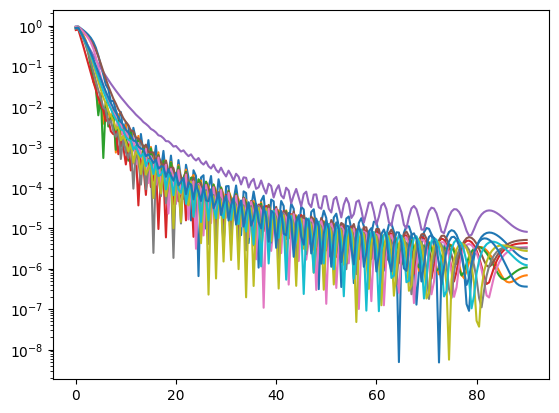

In [2]:
aoi_input = np.linspace(0, 90, 181)
R_E = objective.simulate_reflectivity(model, aoi_input)
for E_pol in model.energy_pol_uni:
    plt.plot(aoi_input, R_E[model.energy_pol_uni.index(E_pol)], label=E_pol)
plt.yscale('log')